In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Training Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

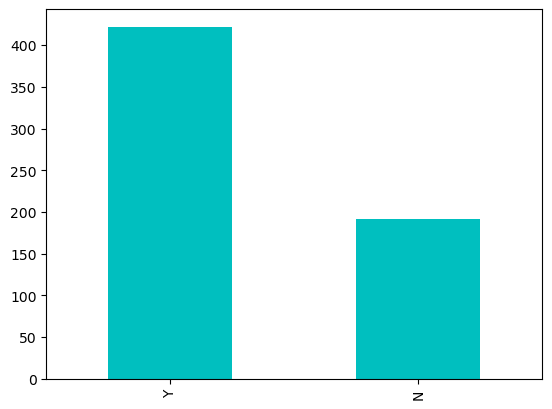

In [9]:
df["Loan_Status"].value_counts().plot(kind='bar',color='c')

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

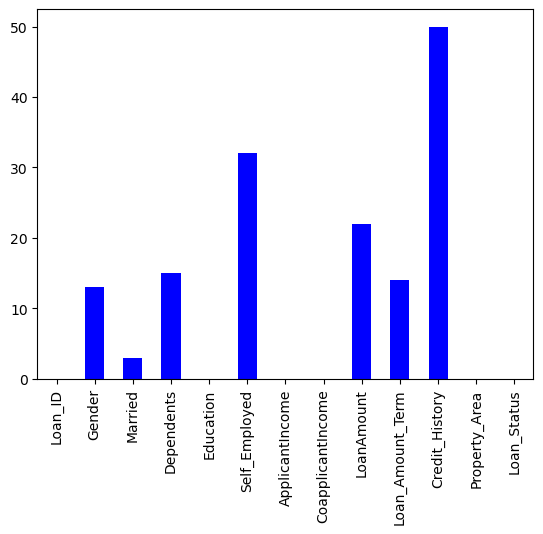

In [11]:
df.isnull().sum().plot(kind='bar',color = 'blue')

# Lets Handle Missing values

In [12]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

<Axes: >

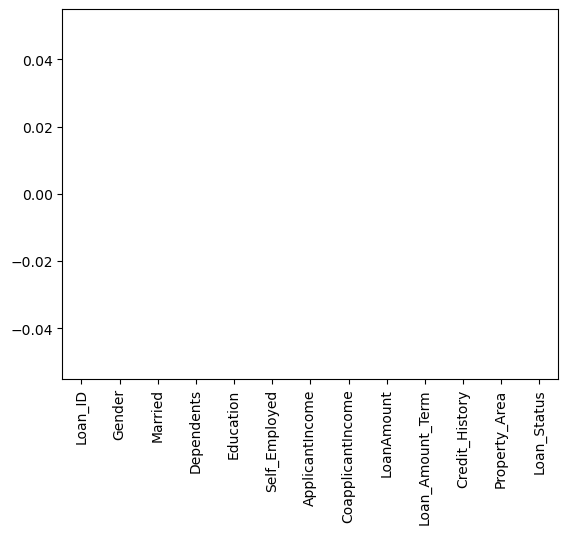

In [13]:
df.isnull().sum().plot(kind='bar',color = 'black')


In [14]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [15]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print("Categorical Columns in training dataset based on datatypes {}".format(categorical_columns))

Categorical Columns in training dataset based on datatypes ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


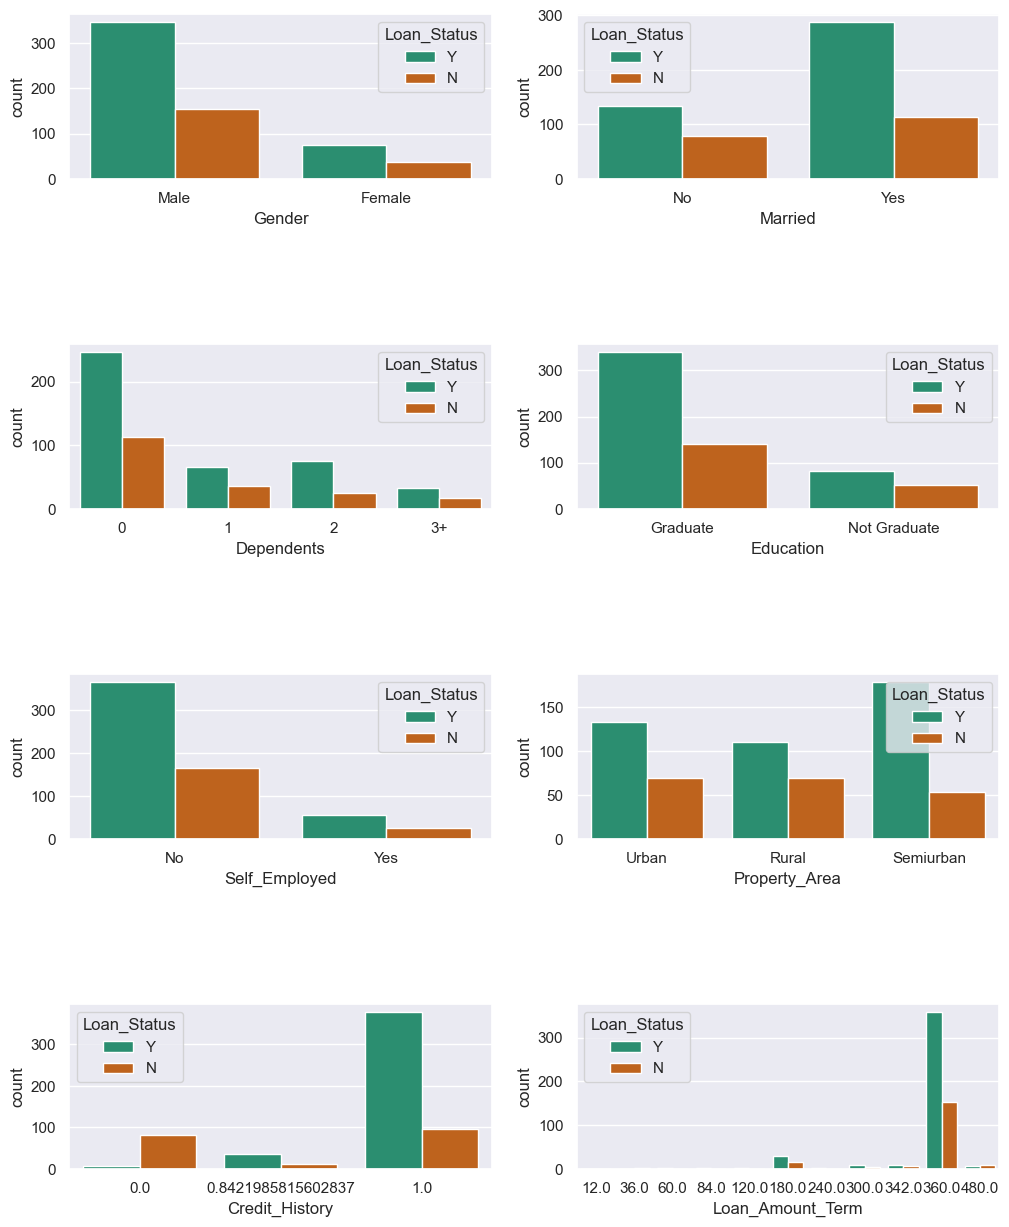

In [16]:
### Data Visualization libraries
sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)

In [17]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns in training dataset based on datatypes {}".format(numerical_columns))

Numerical Columns in training dataset based on datatypes ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


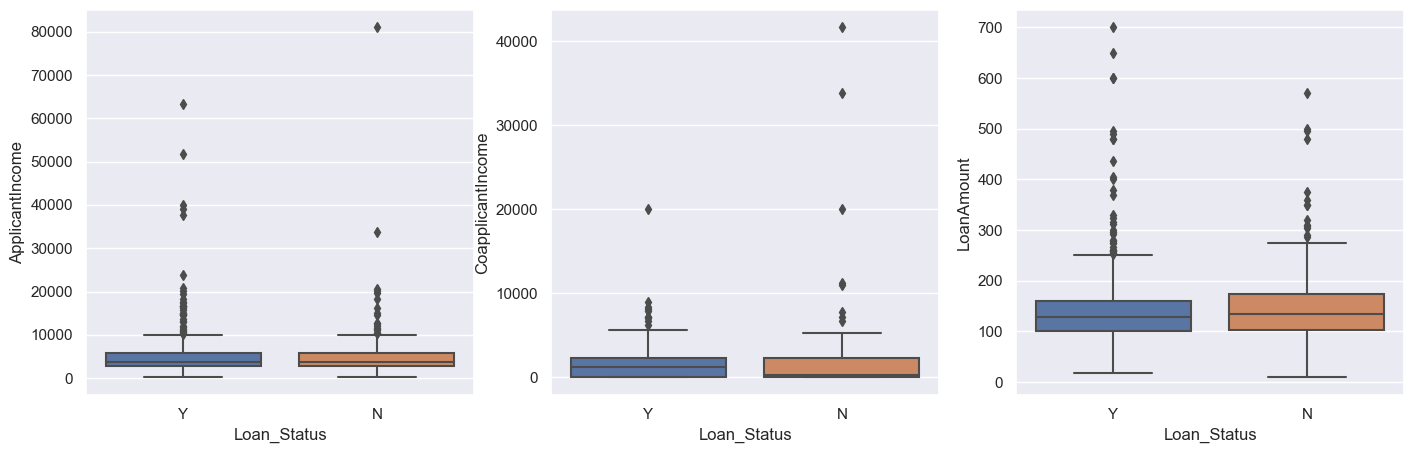

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

C:\Users\Aman Shaema\AppData\Local\Temp\ipykernel_33472\3413836962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


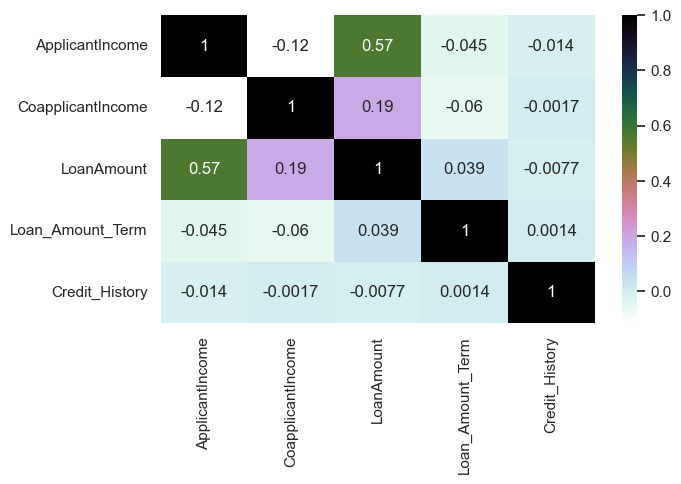

In [19]:
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts.... 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [20]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")
dummy_Loan_status = pd.get_dummies(df['Loan_Status'], prefix = "Approve")
frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents,dummy_Loan_status]

In [25]:
df_train = pd.concat(frames, axis = 1)
df_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_N,Approve_Y
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,0,1,0,0,0,1,0,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,1,0,0,1,1,0,0,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,...,1,0,0,1,0,0,1,0,0,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,...,0,0,0,1,1,0,0,0,0,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,...,0,0,1,0,0,0,0,1,1,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,...,0,0,0,1,0,0,1,0,0,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,...,0,0,1,0,0,1,0,0,1,0


In [26]:
df_train = df_train.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status','Approve_N'])
df_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Approve_Y'],
      dtype='object')

# Lets work on testing dataset

In [28]:
df=pd.read_csv("Test Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [29]:
df.shape

(367, 12)

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [32]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

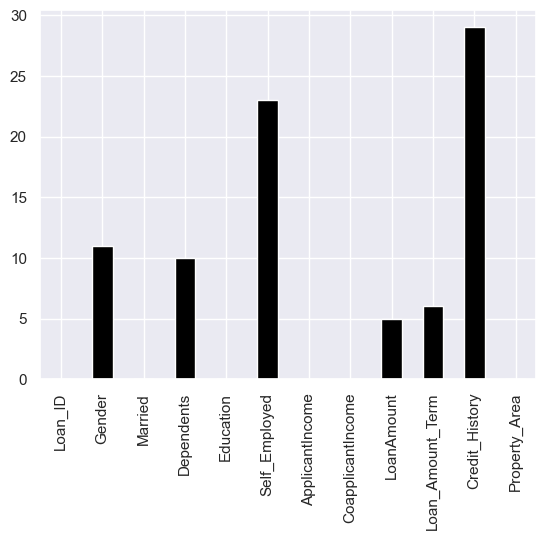

In [33]:
df.isnull().sum().plot(kind='bar',color = 'black')

# Lets Handle Missing values

<Axes: >

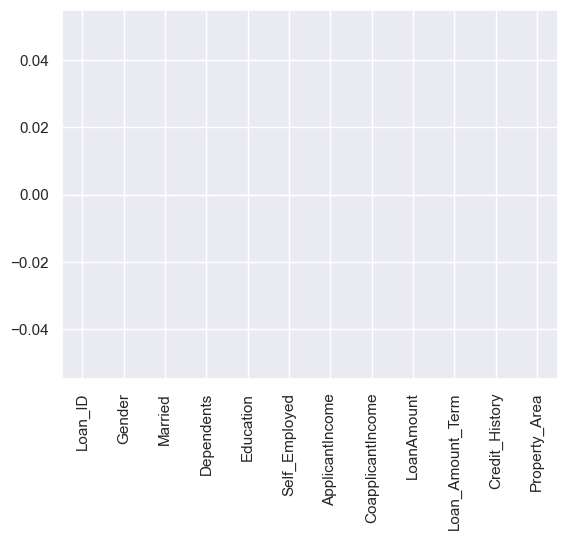

In [34]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df.isnull().sum().plot(kind='bar',color = 'blue')

In [35]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


C:\Users\Aman Shaema\AppData\Local\Temp\ipykernel_33472\2838494183.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


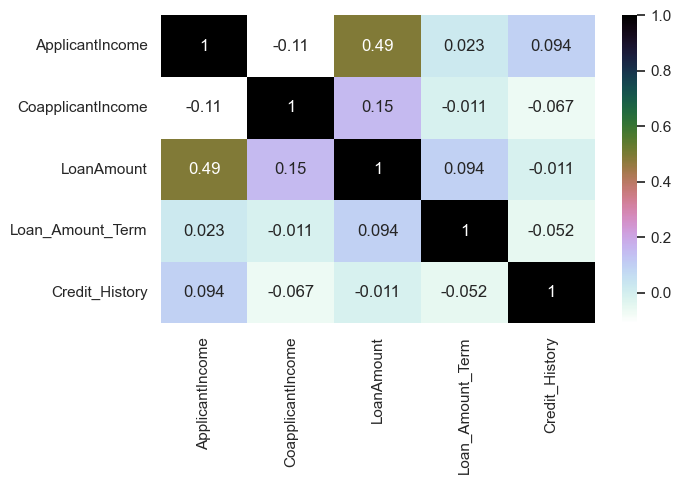

In [36]:
#Checking the correlation...........................
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts.... 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Preprocessing Data

In [37]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")




frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents]
df_test = pd.concat(frames, axis = 1)

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,...,0,1,0,0,0,1,1,0,0,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,...,0,1,0,0,0,1,0,1,0,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,...,0,1,0,0,0,1,0,0,1,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,...,0,1,0,0,0,1,0,0,1,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,...,1,1,0,0,0,1,1,0,0,0


In [38]:
df_test = df_test.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])
df_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [39]:
df_test.shape

(367, 20)

# Final dataset......
Lets Concatenate the two data set....

In [40]:
Final_df=pd.concat([df_train,df_test],axis=0)
Final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


In [41]:
Final_df.shape

(981, 21)

In [42]:
Final_df['Approve_Y']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
Name: Approve_Y, Length: 981, dtype: float64

<Axes: >

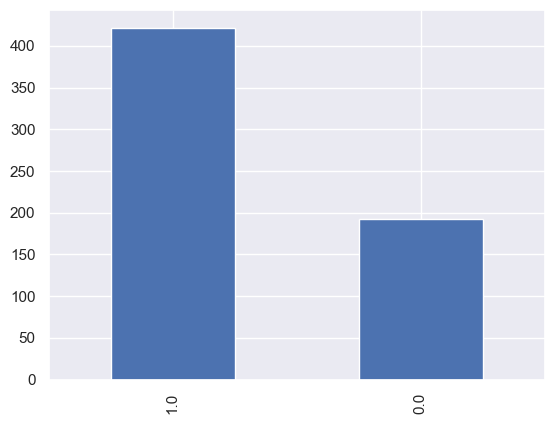

In [43]:
Final_df['Approve_Y'].value_counts().plot(kind='bar')

In [44]:
Final_df["Approve_Y"].isna().sum()

367

In [45]:
Train_df=Final_df.iloc[:614,:]
Test_df=Final_df.iloc[614:,:]

In [46]:
Train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


In [47]:
Train_df.shape

(614, 21)

In [48]:
Test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5720,0.0,110.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,1,0,0,0,NaN
1,3076,1500.0,126.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,NaN
2,5000,1800.0,208.0,360.0,1.000000,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,NaN
3,2340,2546.0,100.0,360.0,0.825444,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,NaN
4,3276,0.0,78.0,360.0,1.000000,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,NaN


In [49]:
Test_df.shape

(367, 21)

In [50]:
X_train=Train_df.drop(['Approve_Y'],axis=1)
y_train=Train_df['Approve_Y']


In [51]:
X_train.shape

(614, 20)

In [52]:
y_train.shape

(614,)

# Prediciton and selecting the right algorithm..

In [53]:
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [54]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

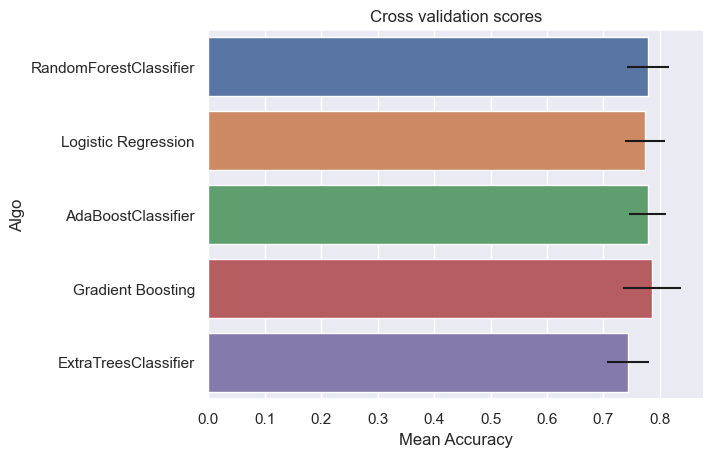

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.778409        0.037567  RandomForestClassifier
1              0.773603        0.034709     Logistic Regression
2              0.778495        0.032646      AdaBoostClassifier
3              0.785095        0.051307       Gradient Boosting
4              0.742695        0.037110    ExtraTreesClassifier


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cv_df is your DataFrame and cv_std is your standard deviation series
g = sns.barplot(x="CrossVal_Score_Means", y="Algo", data=cv_df, orient="h", **{'xerr': cv_std})
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")

# Display the plot
plt.show()

# Print the DataFrame
print(cv_df)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=4)

In [58]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


(0.7108011634056055,
 {'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.1,
  'min_samples_leaf': 100,
  'n_estimators': 100})

In [62]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2, 3],
              "min_samples_split": [7, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}



rf_param_grid = { 
    'max_features':['auto'], 'oob_score':[True], 'random_state':[1],
    "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [ 4, 10 ], "n_estimators": [ 100, 400, 700]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(0.8127313590692755,
 {'criterion': 'gini',
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 100,
  'oob_score': True,
  'random_state': 1})

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
        -1.51412374e-17, -1.46850253e-16, -2.25435982e-17],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
        -4.28672282e-17, -8.08309184e-17, -3.85364701e-17],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
         1.45916650e-16, -1.72105514e-16,  4.90956159e-17],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
         1.55636183e-17,  1.80056851e-16, -7.72615541e-17],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
         2.99563948e-18, -7.23771618e-17, -9.92240977e-18],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
         7.73613463e-17,  1.42767986e-18,  2.49350621e-18]])

In [64]:
#covariance
covariance=pca.get_covariance()

In [65]:
explained_variance=pca.explained_variance_
explained_variance

array([4.37427561e+07, 5.86545030e+06, 4.75532376e+03, 3.87444854e+03,
       5.78603703e-01, 3.78789550e-01, 3.34662905e-01, 2.94748007e-01,
       2.65912095e-01, 2.23659878e-01, 2.03987704e-01, 1.55644512e-01,
       1.20717664e-01, 9.52500373e-02, 2.64590927e-32, 1.06265568e-32,
       9.85415172e-33, 3.91664635e-33, 2.05491685e-33, 1.26184206e-33])

In [66]:
len(explained_variance)

20

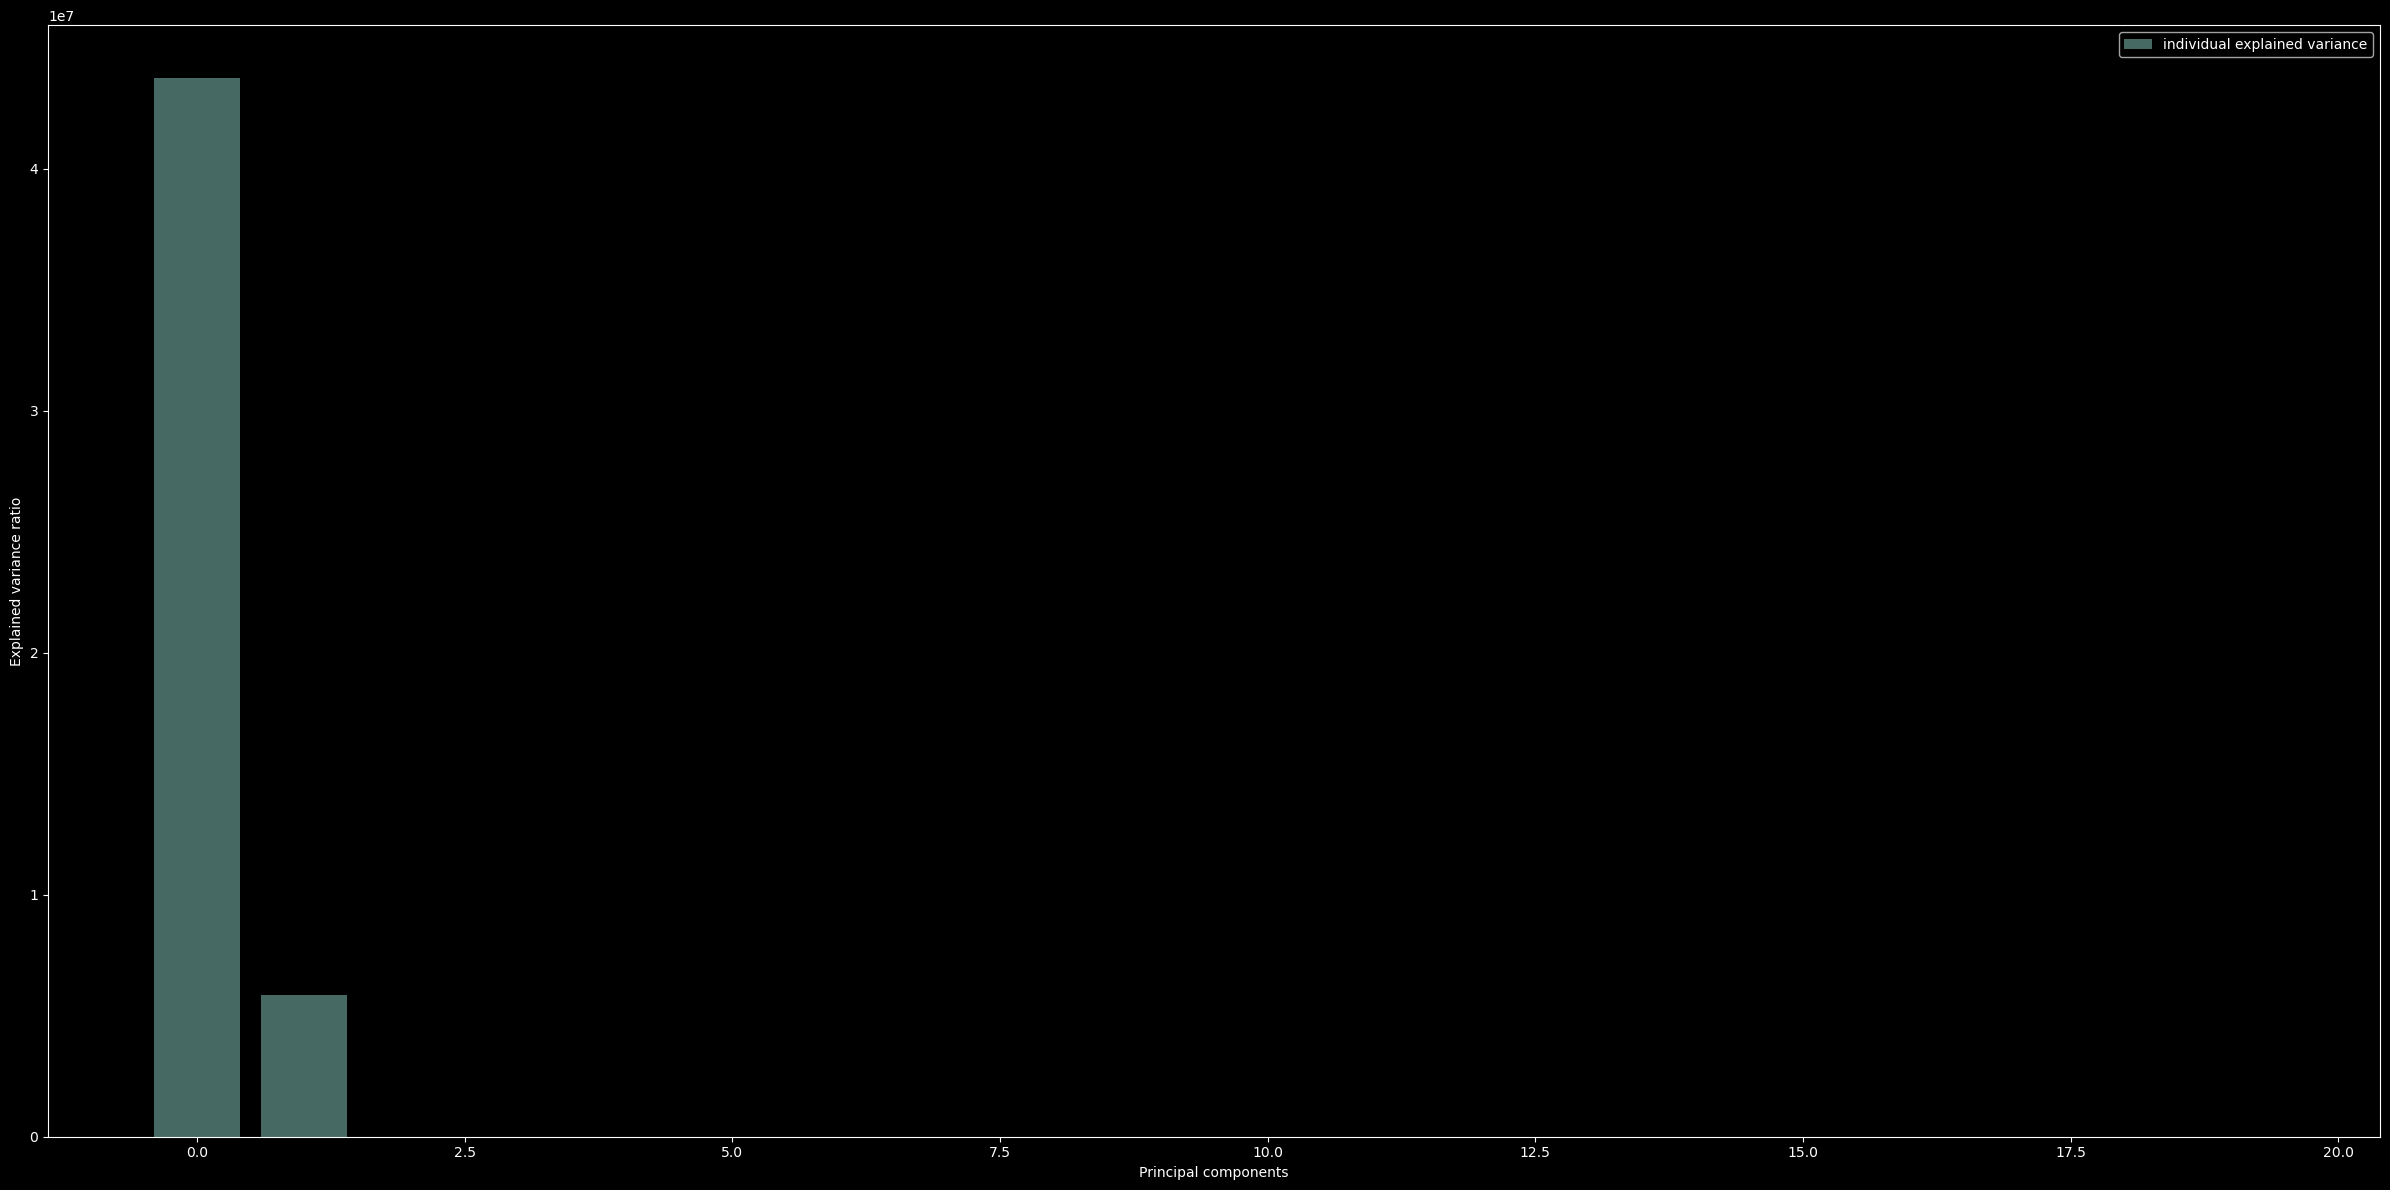

In [76]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(24, 12))
    
    plt.bar(range(20), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

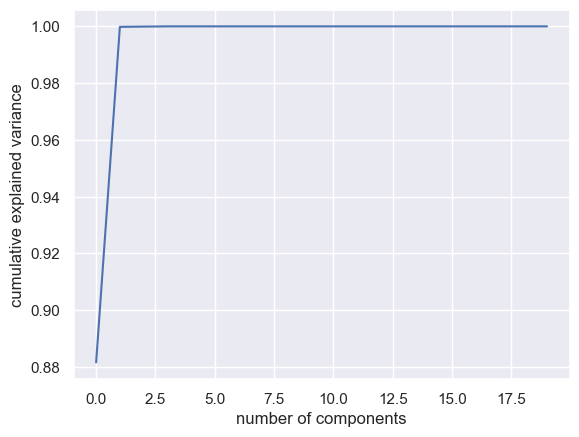

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [77]:
pca=PCA(n_components=18)
pca.fit_transform(X_train)

array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
        -7.21369879e-17,  7.75048488e-18, -1.51412374e-17],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
         1.33770153e-16, -1.09508793e-16, -4.28672282e-17],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
         1.17516964e-16,  9.03785517e-18,  1.45916650e-16],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
        -8.06238587e-18,  9.68120220e-17,  1.55636183e-17],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
         1.37964834e-16, -2.20202085e-18,  2.99563948e-18],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
        -1.21446035e-18,  1.07230470e-16,  7.73613463e-17]])

In [78]:
rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

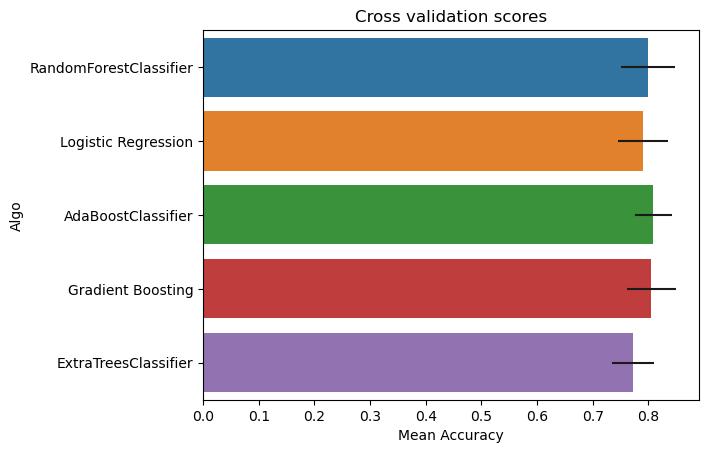

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.798585        0.048382  RandomForestClassifier
1              0.790323        0.045220     Logistic Regression
2              0.808666        0.033513      AdaBoostClassifier
3              0.804601        0.043979       Gradient Boosting
4              0.772078        0.037764    ExtraTreesClassifier


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot with error bars
g = sns.barplot(x="CrossVal_Score_Means", y="Algo", data=cv_df, orient="h", **{'xerr': cv_std})

# Set the x-axis label
g.set_xlabel("Mean Accuracy")

# Set the plot title
g.set_title("Cross validation scores")

# Display the plot
plt.show()

# Print the DataFrame
print(cv_df)
